# Clustering Methods

Making a K-Means model from a Youtube video then making a DBSCAN model on the same data

## K-Means Model

This was created by following a youtube tutorial

### Import packages and dataset

`pandas` was imported for any dataframe use

`numpy` was imported for array manipulation

`matplotlib.pyplot` is used for visualizing data

`make_blobs` is used to create the dataset

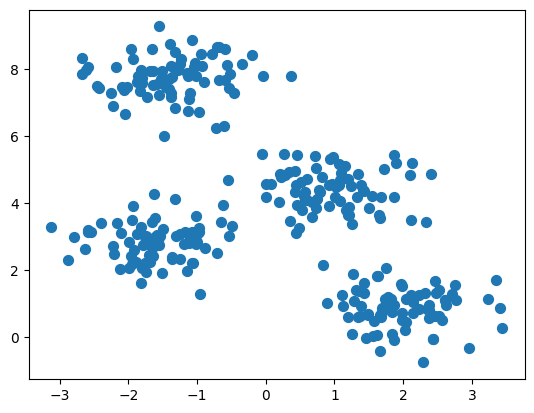

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

### Assign clusters

1. import `KMeans` to build the model

2. build the KMeans model using 4 clusers as identified above

3. Fit the model to the dataset

4. Make predictions about dataset

5. display categorization of points

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

y_kmeans[:5]

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 3, 0, 1])

### Visualize categorized data

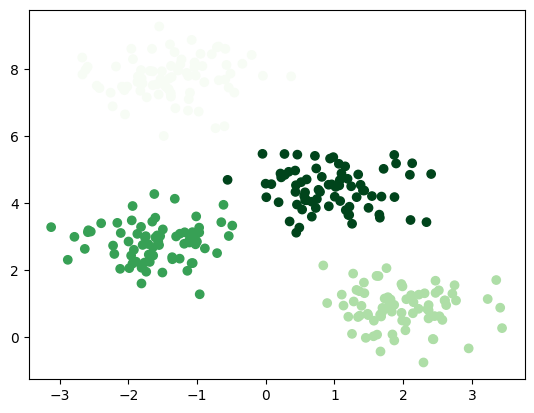

In [3]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='Greens')

## Create a DBSCAN model to compare results

This model was made without following a tutorial

### Create a model and fit it to data

1. Import `DBSCAN` to create a model

2. Set an initial min_sample size to 3

3. Fit the model to the data

4. Create a list of the labels

5. Display categorization of points

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3)
dbscan.fit(X)

y_dbscan = dbscan.labels_

y_dbscan[:5]

array([2, 0, 1, 0, 2], dtype=int64)

### Visualize result of model

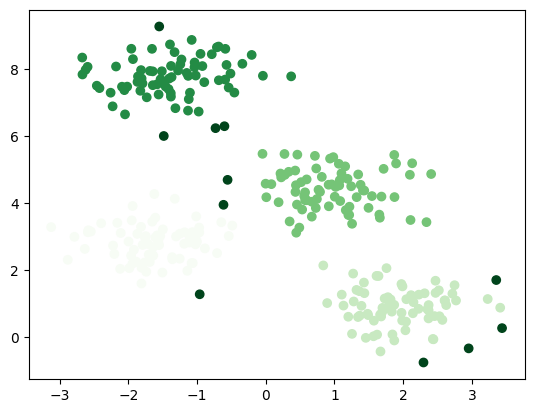

In [5]:
plt.scatter(X[:,0], X[:,1], c=y_dbscan, cmap='Greens_r')

### Refining DBSCAN Model

Use a grid search to improve the model by finding optimal parameters

1. import `sihouette_score` to evaluate the accuracy of the model
2. Create a grid search function to find the best parameters
3. Make a list of possible parameters
4. Feed possible parameters into function
5. Create a new model from the results of the function
6. Fit the model and display results

#### Grid Search Function

In [6]:
from sklearn.metrics import silhouette_score as ss

def get_scores_and_labels(combinations, X):
    # Create empty lists to store results
    scores = []
    all_labels_list = []
    
    # Loop through all possible DBSCANs
    for i, (eps, num_samples) in enumerate(combinations):
        # Make a new model with parameters
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        
        # Determine label
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        
        # Determine number of clusters in the model
        num_clusters = len(labels_set)
        
        # Reduce the number of cluster by one if noise is included
        if -1 in labels_set:
            num_clusters -= 1
        
        # If the number of clusters is unreasonable, append a junk value
        if (num_clusters<2) or (num_clusters>50):
            scores.append(-10)
            all_labels_list.append('bad')
            continue
            
        # Add the score and label to the predefined arrays
        scores.append(ss(X,labels))
        all_labels_list.append(labels)
        
    # Determine the index with the best result and find the best values
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]
    
    # Return a dictionary with the best parameters
    return {'best_epsilon':best_parameters[0],
            'best_min_samples':best_parameters[1],
            'best_labels':best_labels,
            'best_score':best_score}

#### Create a list of possible parameters

In [7]:
epsilons = np.linspace(0.6, 0.8, num=15)
min_samples = np.arange(8,10,step=1)

import itertools

combinations = list(itertools.product(epsilons,min_samples))

#### Get best parameters

In [8]:
best_dict = get_scores_and_labels(combinations,X)
best_dict

{'best_epsilon': 0.7285714285714286,
 'best_min_samples': 8,
 'best_labels': array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
         2,  3,  3,  2,  2,  1,  3,  3,  1,  2,  1,  3,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  3,  2,  1,  3,  1,  1,  3,  3,  0,  3,  0,  2,  3,
         2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1,  0,  3,  3,  3,  0,  2,
         0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
         1,  2,  1,  0,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
         0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
         1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
         3,  0,  1,  0,  0,  3,  1,  3,  1,  3,  0,  1,  0,  0,  0,  1,  0,
         1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3,  3,  1,  2,  1,
         1,  0,  2,  1,  3,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
         1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
         1, 

#### Creat model with best parameters

In [9]:
new_dbscan = DBSCAN(eps=best_dict['best_epsilon'], min_samples=8)

#### Fit the model to the dataset and extract labels

In [10]:
new_dbscan.fit(X)
predictions = new_dbscan.labels_

#### Display results of DBSCAN

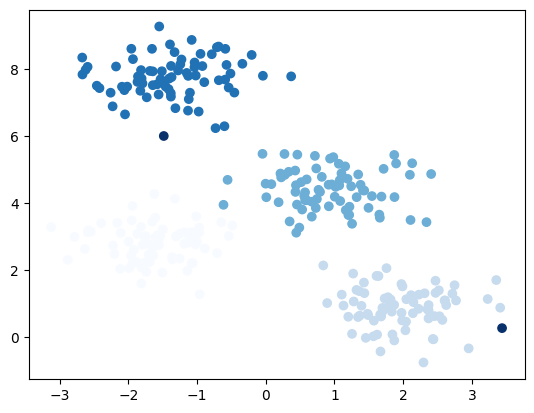

In [11]:
plt.scatter(X[:,0], X[:,1], c=predictions, cmap="Blues_r")